**Part 1: feature engineering** 

***EXO1***

In [1]:
# Exercice 1
import pandas as pd
import numpy as np
from scipy.stats import entropy
# Load the dataset
data = pd.DataFrame({
    "Temperature": [75, 80, 85, 70, 65, 60, 190],
    "Cloud Cover": ["Sunny", "Partly Cloudy", "Overcast", "Sunny", "Overcast", "Partly Cloudy", "Overcast"],
    "Humidity": ["Low", "High", "High", "Medium", "Medium", "Low", "High"],
    "Weather": ["Sunny", "Sunny", "Rainy", "Sunny", "Stormy", "Sunny", "Rainy"]
})

# 1. Discretize the feature Temperature
def discretize_temperature(temp):
    if temp <= 70:
        return "Warm"
    elif temp <= 80:
        return "Hot"
    else:
        return "Very Hot"

data["Temperature_Discretized"] = data["Temperature"].apply(discretize_temperature)

# 2. Calculate the entropy of the target class Weather
def calculate_entropy(data, target_feature):
    target_values = data[target_feature].value_counts().sort_values(ascending=False)
    probabilities = target_values / target_values.sum()
    entropy = -probabilities.apply(lambda p: p * np.log2(p)).sum()
    return entropy

entropy_weather = calculate_entropy(data, "Weather")

# 3. Calculate the information gain for each feature
def calculate_information_gain(data, feature, target_feature):
    feature_values = data[feature].unique()
    total_entropy = calculate_entropy(data, target_feature)
    conditional_entropy = 0
    for value in feature_values:
        subset = data[data[feature] == value]
        conditional_entropy += (subset.shape[0] / data.shape[0]) * calculate_entropy(subset, target_feature)
    information_gain = total_entropy - conditional_entropy
    return information_gain

information_gain_temperature = calculate_information_gain(data, "Temperature_Discretized", "Weather")
information_gain_cloud_cover = calculate_information_gain(data, "Cloud Cover", "Weather")
information_gain_humidity = calculate_information_gain(data, "Humidity", "Weather")
print('information about gain temperature:\n')
print(information_gain_temperature)
print('information about gain cloud cover:\n')
print(information_gain_cloud_cover)
print('information about gain humidity:\n')
print(information_gain_humidity)

# 4. Order the features according to their IG
feature_importance = pd.DataFrame({
    "Feature": ["Temperature_Discretized", "Cloud Cover", "Humidity"],
    "Information Gain": [information_gain_temperature, information_gain_cloud_cover, information_gain_humidity]
})
feature_importance = feature_importance.sort_values(by="Information Gain", ascending=False)

print("Feature Importance:")
print(feature_importance)

information about gain temperature:

0.9852281360342513
information about gain cloud cover:

0.9852281360342513
information about gain humidity:

0.6995138503199656
Feature Importance:
                   Feature  Information Gain
0  Temperature_Discretized          0.985228
1              Cloud Cover          0.985228
2                 Humidity          0.699514


**EXO2**

In [2]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [3]:
data = np.array([
    [12, 24, 6],
    [17, 15.5, -2],
    [12, 13, 3],
    [6, 13.5, -2.5],
    [17, 21, 7.2],
    [4, 20.3, -0.9]
])
df = pd.DataFrame(data)
df

,0,1,2
0,12.0,24.0,6.0
1,17.0,15.5,-2.0
2,12.0,13.0,3.0
3,6.0,13.5,-2.5
4,17.0,21.0,7.2
5,4.0,20.3,-0.9


In [4]:
means = np.mean(data, axis=0)
print("the mean is :",means)
stds = np.std(data, axis=0)
print("the std is :",stds)

the mean is : [11.33333333 17.88333333  1.8       ]
the std is : [4.95535625 4.11720644 3.83970485]


In [5]:
standardized_data = (data - means) / stds
df = pd.DataFrame(standardized_data)
df.name = 'Standardized Data'
print(df.name)
df

Standardized Data


,0,1,2
0,0.134535,1.485635,1.093834
1,1.143544,-0.578871,-0.989659
2,0.134535,-1.186079,0.312524
3,-1.076276,-1.064638,-1.119878
4,1.143544,0.756986,1.406358
5,-1.479880,0.586968,-0.703179


The covariance matrix : 
  [[1.2        0.104237   0.58232715]
 [0.104237   1.2        0.73427191]
 [0.58232715 0.73427191 1.2       ]]


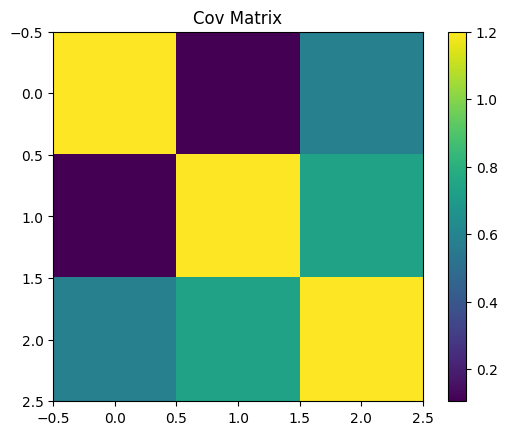

In [6]:
import matplotlib.pyplot as plt
cov_matrix = np.cov(standardized_data, rowvar=False)
print(f"The covariance matrix : \n ",cov_matrix)
# Display the matrix using Matplotlib
plt.imshow(cov_matrix, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Cov Matrix')
plt.show()


In [7]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

Eigenvalues:
 [2.18954918 1.09856979 0.31188102]

Eigenvectors:
 [[-0.46348371 -0.78498896 -0.41106591]
 [-0.55899398  0.61896667 -0.55173   ]
 [-0.68753806  0.0259345   0.72568507]]


In [8]:
sorted_indices = np.argsort(eigenvalues)[::-1]  # Indices triés en ordre décroissant
print("sorted indice \n:",sorted_indices)
sorted_eigenvalues = eigenvalues[sorted_indices]
print("sorted valeurs propres \n :",sorted_eigenvalues)
sorted_eigenvectors = eigenvectors[:, sorted_indices]
print("sorted vecteurs porpres \n :",sorted_eigenvectors)

sorted indice 
: [0 1 2]
sorted valeurs propres 
 : [2.18954918 1.09856979 0.31188102]
sorted vecteurs porpres 
 : [[-0.46348371 -0.78498896 -0.41106591]
 [-0.55899398  0.61896667 -0.55173   ]
 [-0.68753806  0.0259345   0.72568507]]


In [9]:
total_var = np.sum(sorted_eigenvalues) #somme de valeurs propres 
print("total variable \n",total_var)
explained_var = sorted_eigenvalues / total_var #les portions des valeurs propres 
print(" explained variable \n",explained_var)
cumulative_var = np.cumsum(explained_var) # la somme des portions 
print("cumulative variable \n",cumulative_var)

total variable 
 3.599999999999997
 explained variable 
 [0.60820811 0.30515828 0.08663362]
cumulative variable 
 [0.60820811 0.91336638 1.        ]


In [10]:
threshold_variance = 0.9  # garder 90% de la variance totale
num_components = np.argmax(cumulative_var >= threshold_variance) + 1
print("nombre de composants est \n: ",num_components)

nombre de composants est 
:  2


In [11]:
projection_matrix = sorted_eigenvectors[:, :num_components]
print("projection matrix: \n",projection_matrix)

projection matrix: 
 [[-0.46348371 -0.78498896]
 [-0.55899398  0.61896667]
 [-0.68753806  0.0259345 ]]


In [12]:
reduced_data = np.dot(standardized_data, projection_matrix)
print("Matrice de données réduite R : \n",reduced_data)

Matrice de données réduite R : 
 [[-1.64486824  0.84231855]
 [ 0.47400026 -1.28163768]
 [ 0.38578445 -0.83164654]
 [ 1.86392126  0.1568464 ]
 [-1.9200891  -0.39264706]
 [ 0.84125137  1.50676634]]


**Practical work**

***Feature selection***

In [13]:
import pandas as pd

In [14]:
# Get the data
df = pd.read_csv("/kaggle/input/titanic-dataset/train (1).csv")
# Descibe it with statistical indicators
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
# get the correlation between the features and the 'Survived' feature
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix["Survived"].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [20]:
# get the correlation between the features and the 'Survived' feature
numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix["Survived"].sort_values(ascending=False))

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


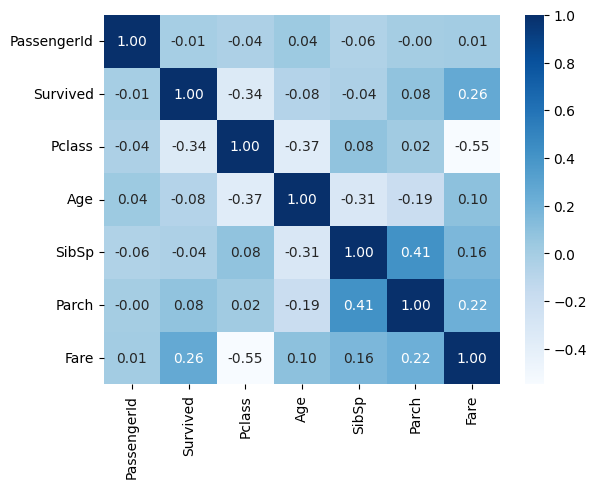

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns = df.select_dtypes(include=["float64", "int64"]).columns
correlation_matrix = df[numeric_columns].corr()

# We can also use a heatmap
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt=".2f")
plt.show()

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [24]:
#  Clean the data by dealing with missing values, dropping unnecessary features, standardizing the data

print(f"The df shape before cleaning: {df.shape}")
print(f"The number of null values before cleaning :  {df.isnull().sum().sum()}")

# drop duplicates
df.drop_duplicates(inplace=True)

# drop the column cabin with too many missing values
# drop the name and ticket columns as it's insignificant
cleaned_df = df.drop(columns=["Cabin", "Name", "Ticket"])


# imputate the age column  anf name column
mean_age = cleaned_df["Age"].mean()
cleaned_df["Age"].fillna(mean_age, inplace=True)


# drop 2 rows with missing values in the embarked column
cleaned_df.dropna(subset=["Embarked"], inplace=True)

print(f"\nthe df shape after cleaning : {cleaned_df.shape}")
print(f"The number of null values after cleaning :  {cleaned_df.isnull().sum().sum()}")

The df shape before cleaning: (891, 12)
The number of null values before cleaning :  866

the df shape after cleaning : (889, 9)
The number of null values after cleaning :  0


In [25]:
cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cleaned_df[["Age", "Fare"]] = scaler.fit_transform(cleaned_df[["Age", "Fare"]])

cleaned_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,-0.590495,1,0,-0.500240,S
1,2,1,1,female,0.643971,1,0,0.788947,C
2,3,1,3,female,-0.281878,0,0,-0.486650,S
3,4,1,1,female,0.412509,1,0,0.422861,S
4,5,0,3,male,0.412509,0,0,-0.484133,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,-0.204724,0,0,-0.384475,S
887,888,1,1,female,-0.821957,0,0,-0.042213,S
888,889,0,3,female,0.003524,1,2,-0.174084,S
889,890,1,1,male,-0.281878,0,0,-0.042213,C


In [27]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

X = cleaned_df.drop("Survived", axis=1)
y = cleaned_df["Survived"]

# Encode the categorcial column : gender 0 : female , 1 : male
label_encoder = LabelEncoder()
X_encoded = X.apply(label_encoder.fit_transform)
mutual_info = mutual_info_classif(X_encoded, y)

feature_mutual_info = pd.Series(mutual_info, index=X.columns).sort_values(
    ascending=False
)
print(f"Information Gain for Each Feature in descending order:\n{feature_mutual_info}")

Information Gain for Each Feature in descending order:
Sex            0.123670
Fare           0.055278
Pclass         0.035644
PassengerId    0.007447
Age            0.000000
SibSp          0.000000
Parch          0.000000
Embarked       0.000000
dtype: float64


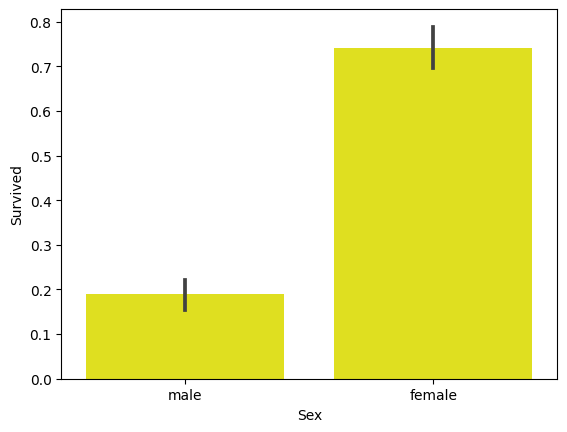

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=cleaned_df, x="Sex", y="Survived", color="yellow")
plt.show()

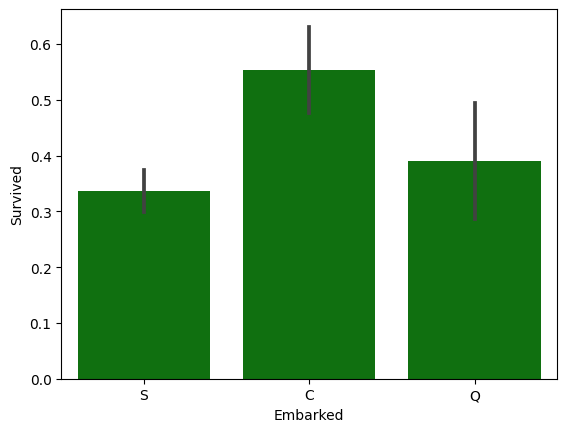

In [29]:
sns.barplot(data=cleaned_df, x="Embarked", y="Survived", color="green")
plt.show()

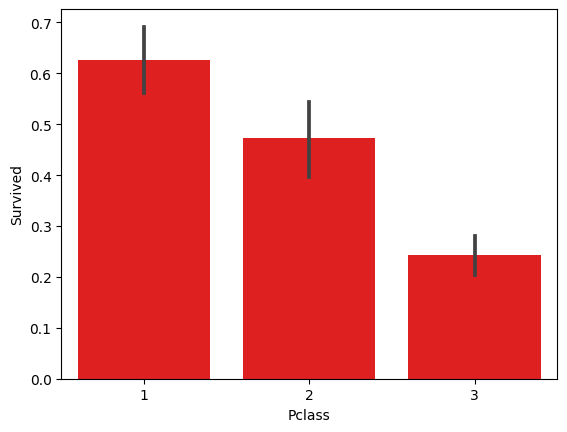

In [30]:
sns.barplot(data=cleaned_df, x="Pclass", y="Survived", color="red")
plt.show()

In [31]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score


# split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
# print(X_train.shape)
# print(X_test.shape)
# Test different configurations of number of features, k values, and distance measures
features_to_test = [2, 3, 4]
k_values = [3, 5, 7]
distance_measures = ["euclidean", "manhattan", "cosine"]

results = []

# try all possible combinations
for num_features in features_to_test:
    for k in k_values:
        for distance_measure in distance_measures:
            # Select the top 'num_features' based on mutual information
            top_features = list(X.columns[np.argsort(mutual_info)[-num_features:]])
            # Train the K-NN classifier
            knn_classifier = KNeighborsClassifier(
                n_neighbors=k, metric=distance_measure
            )
            knn_classifier.fit(X_train[top_features], y_train)
             # Make predictions on the test set
            y_pred = knn_classifier.predict(X_test[top_features])

            # Measure precision
            precision = precision_score(y_test, y_pred)
            # Store the results in a dict
            results.append(
                {
                    "NumFeatures": num_features,
                    "K": k,
                    "DistanceMeasure": distance_measure,
                    "Precision": precision,
                }
            )

# Visualize and interpret results
results_df = pd.DataFrame(results)
results_df

,NumFeatures,K,DistanceMeasure,Precision
0,2,3,euclidean,0.691176
1,2,3,manhattan,0.701493
2,2,3,cosine,0.250000
3,2,5,euclidean,0.691176
4,2,5,manhattan,0.691176
5,2,5,cosine,0.670588
6,2,7,euclidean,0.666667
7,2,7,manhattan,0.676471
8,2,7,cosine,0.687500
9,3,3,euclidean,0.652778


In [32]:
# try the prediction with the best combination
# k= 3 , 4 top features, distance metric : cosine

In [33]:
# get the com with maximum precision
best_combi_row = results_df.loc[results_df["Precision"].idxmax()]

print(f"The best combination is :\n\n{best_combi_row}")

The best combination is :

NumFeatures              3
K                        7
DistanceMeasure     cosine
Precision          0.71831
Name: 17, dtype: object


/tmp/ipykernel_19/3519591517.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.catplot(


<Figure size 1500x1200 with 0 Axes>

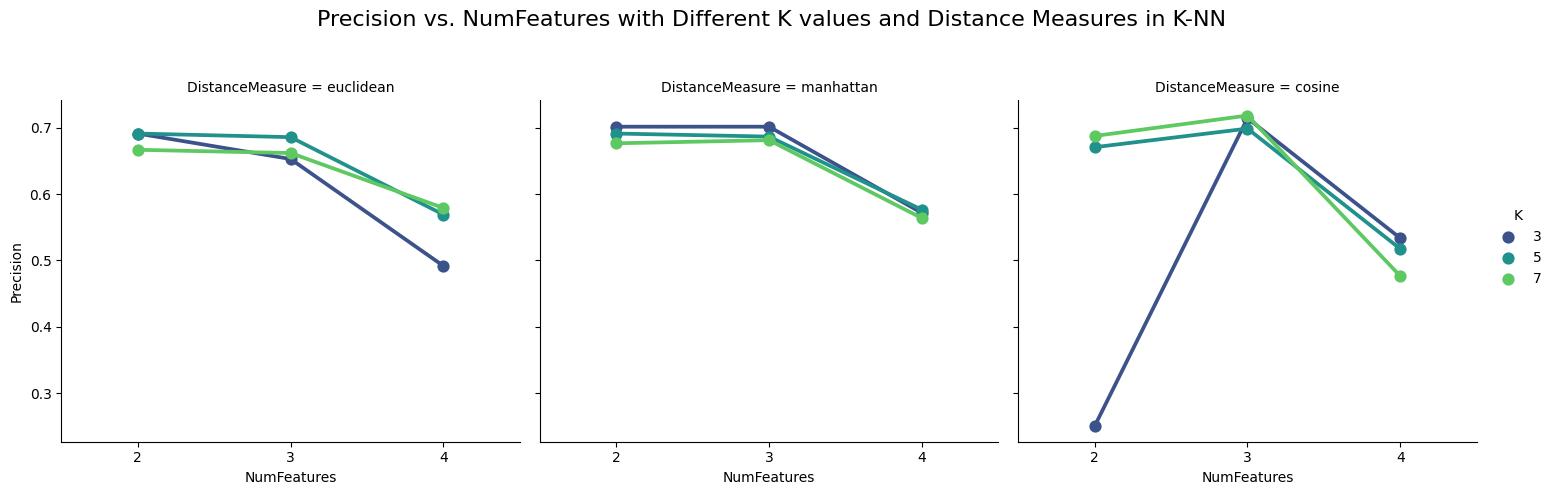

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


# Create a catplot with pointplot
plt.figure(figsize=(15, 12))
sns.catplot(
    data=results_df,
    x="NumFeatures",
    y="Precision",
    hue="K",
    col="DistanceMeasure",
    kind="point",
    markers="o",
    linestyles="-",
    palette="viridis",
    ci=None,
)
plt.subplots_adjust(top=0.80)
plt.suptitle(
    "Precision vs. NumFeatures with Different K values and Distance Measures in K-NN",
    fontsize=16,
)
plt.xlabel("NumFeatures")
plt.ylabel("Precision")
plt.show()

**Feature extraction**

In [35]:
import pandas as pd

In [36]:
df = pd.read_csv("/kaggle/input/iris-dataset/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [37]:
# Statistical description of the data
description = df.describe()
description

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [38]:
print(df.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [39]:
print(df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [40]:
# Handling missing values (if any)
missing_values = df.isnull().sum()
# Dropping unnecessary features ('Id')
data_cleaned = df.drop('Id', axis=1)  # Dropping 'Id' column
print("cleaned data :",data_cleaned)
# Standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_cleaned.drop('Species', axis=1))  # Excluding the target 'Species' column

cleaned data :      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [41]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(scaled_data)

# Ranking features by variance
variance_rank = pd.Series(pca.explained_variance_ratio_, index=data_cleaned.columns[:-1]).sort_values(ascending=False)
print(variance_rank)

SepalLengthCm    0.727705
SepalWidthCm     0.230305
PetalLengthCm    0.036838
PetalWidthCm     0.005152
dtype: float64


In [42]:
from sklearn.cluster import KMeans
# Testing different configurations for KMeans clustering
feature_sets = [2, 3, 4]  # Testing different numbers of features
cluster_numbers = [2, 3, 4]  # Testing different numbers of clusters
similarity_measures = ['euclidean', 'manhattan', 'cosine']  # Different similarity measures

results = []

for n_features in feature_sets:
    for n_clusters in cluster_numbers:
        for measure in similarity_measures:
            # Apply KMeans clustering
            kmeans = KMeans(n_clusters=n_clusters, n_init=10)  # Set n_init explicitly
            kmeans.fit(scaled_data[:, :n_features])  # Considering different feature sets
            cluster_labels = kmeans.labels_
            
            # Evaluate clusters using a density-based technique
            cluster_sizes = [sum(cluster_labels == i) for i in range(n_clusters)]

            # Save results for analysis
            results.append((n_features, n_clusters, measure, cluster_sizes))


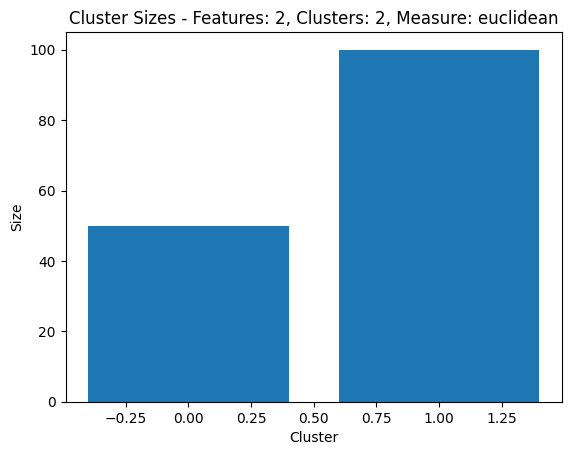

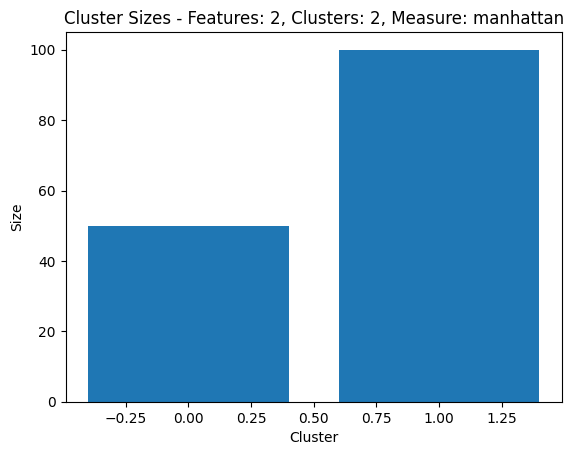

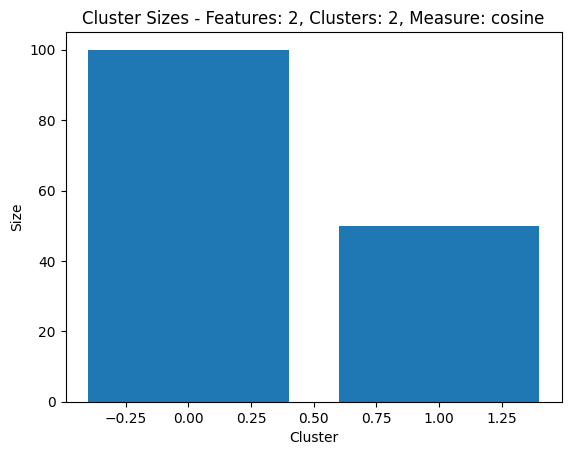

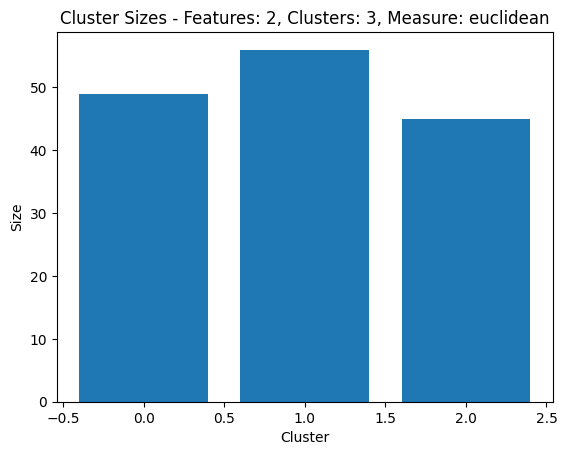

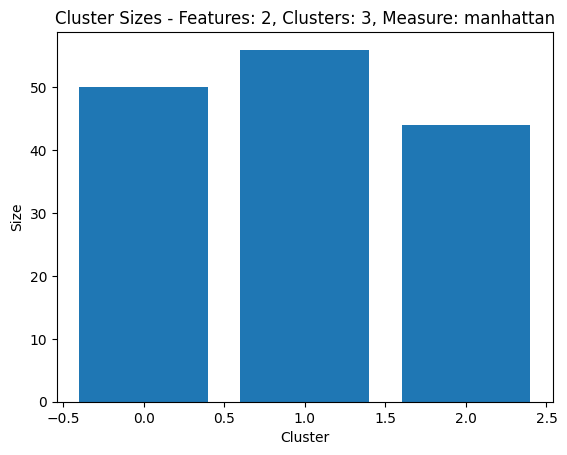

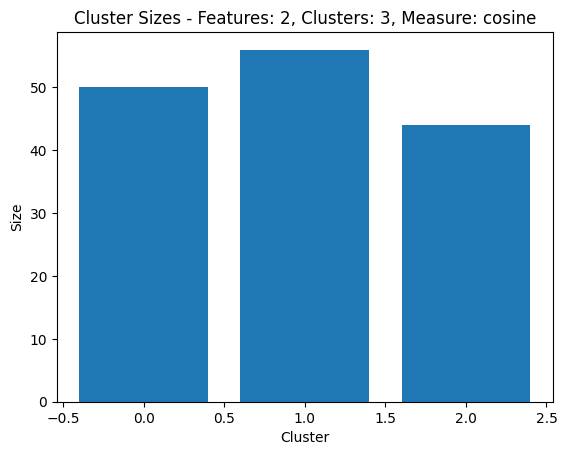

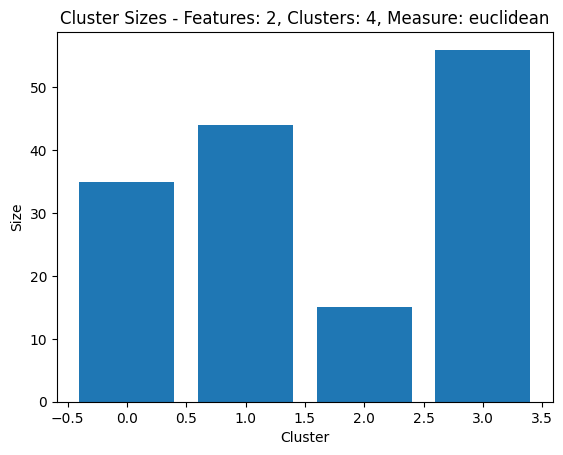

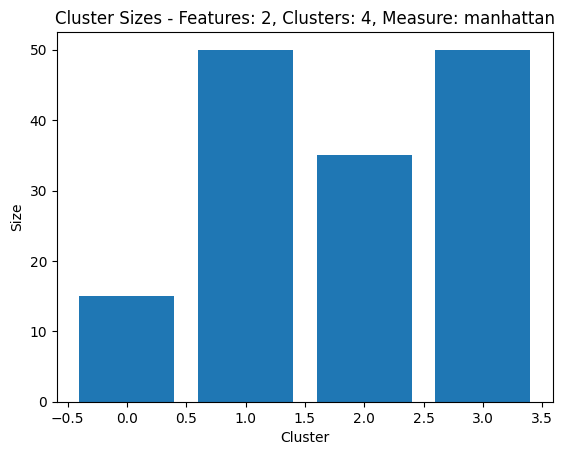

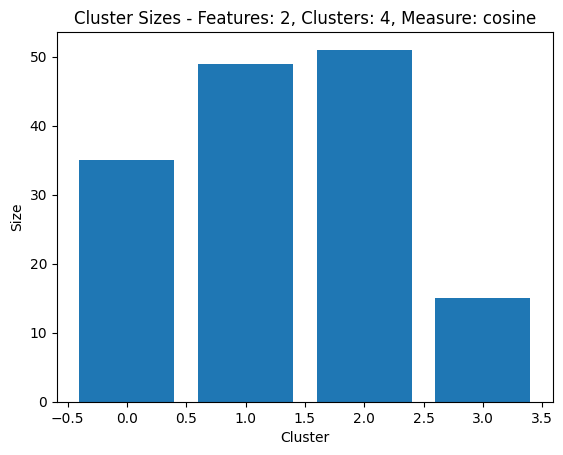

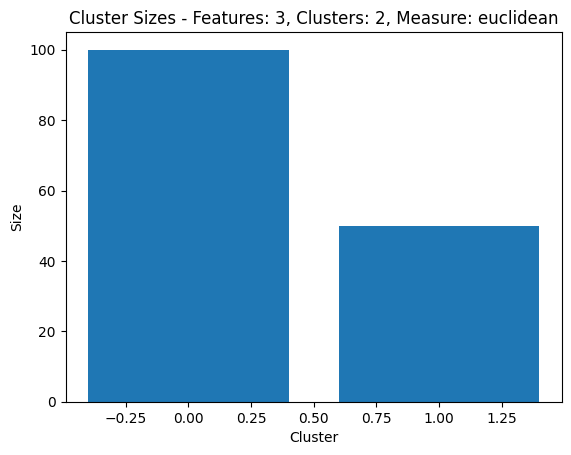

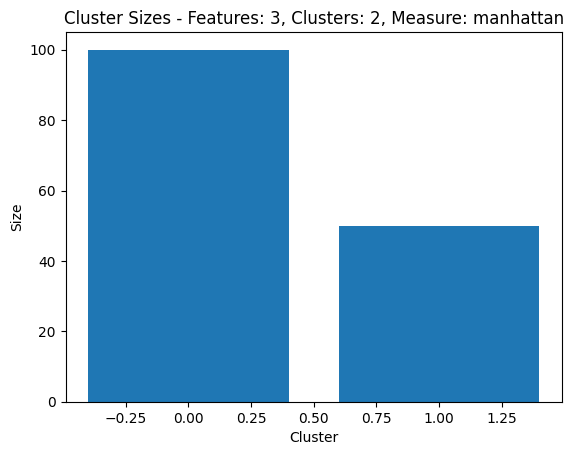

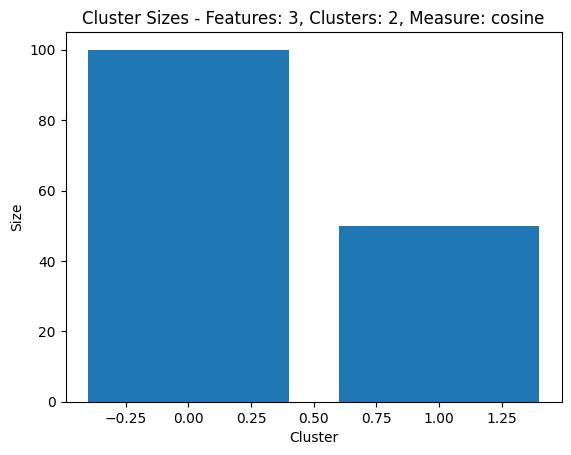

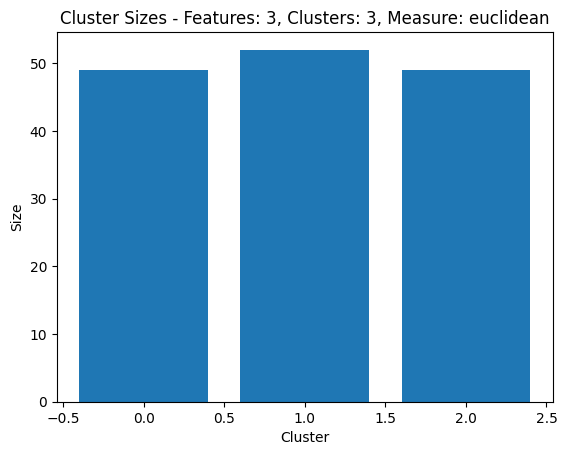

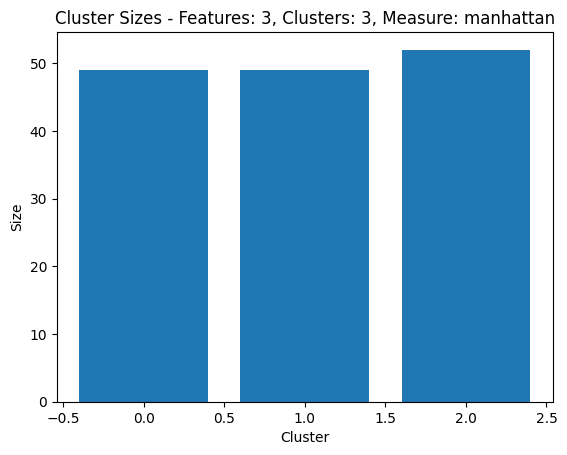

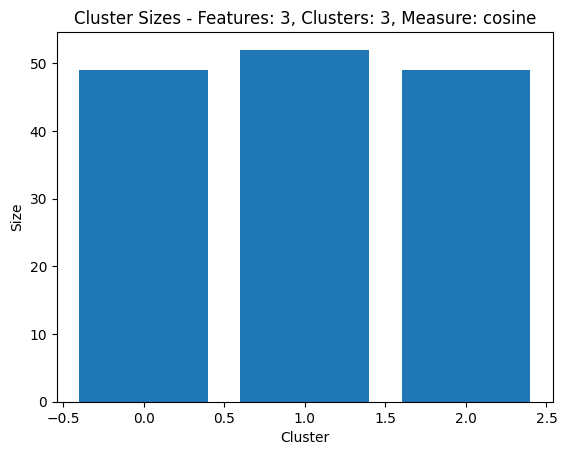

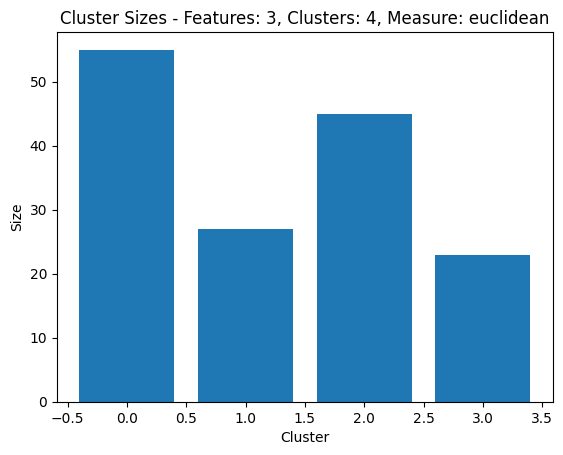

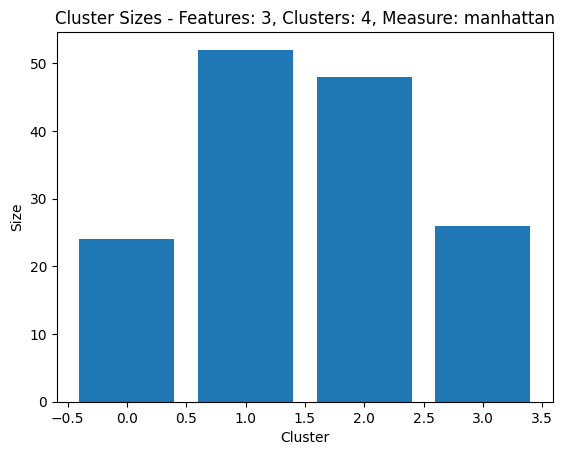

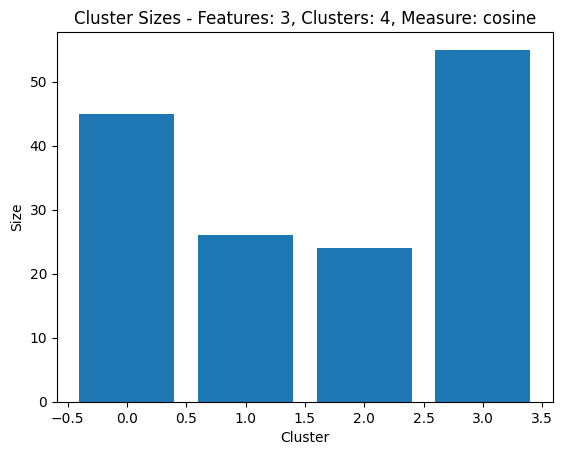

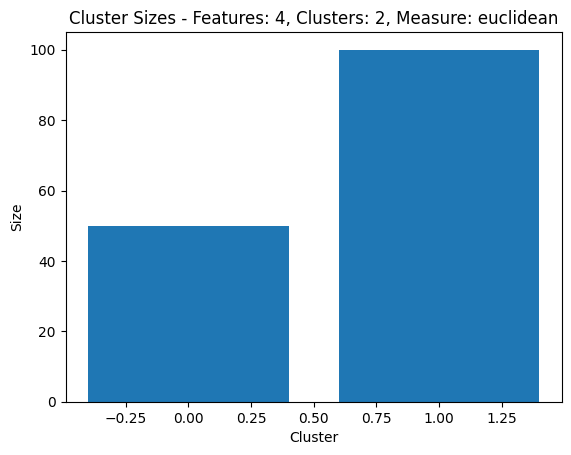

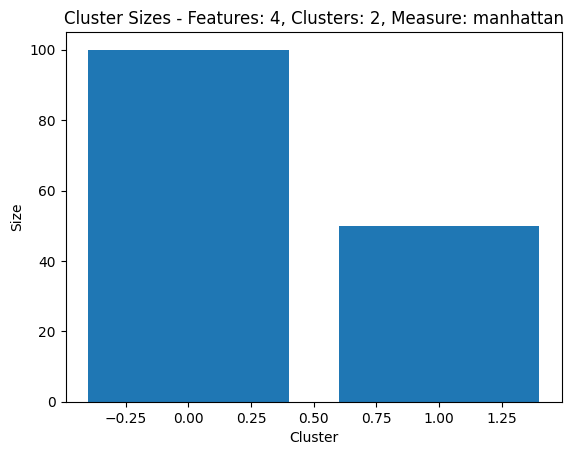

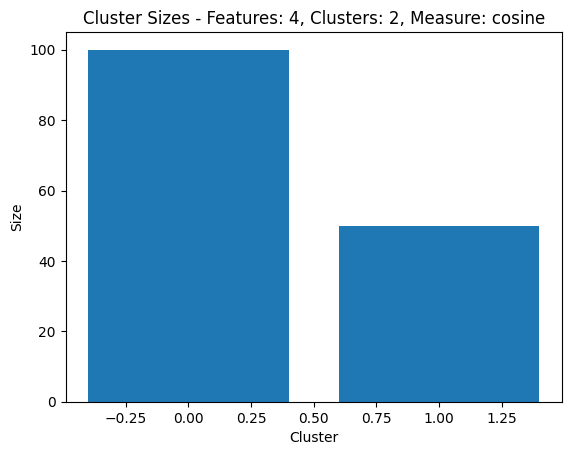

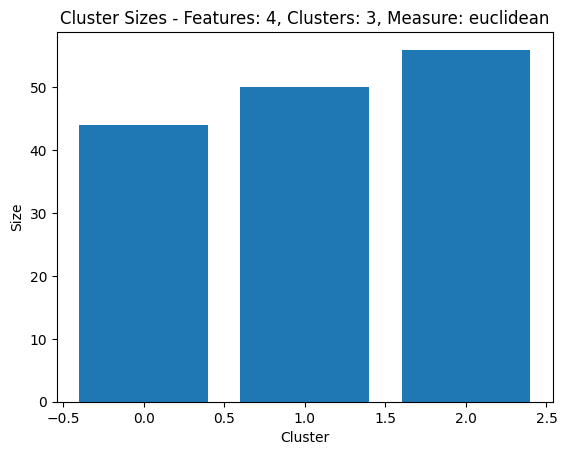

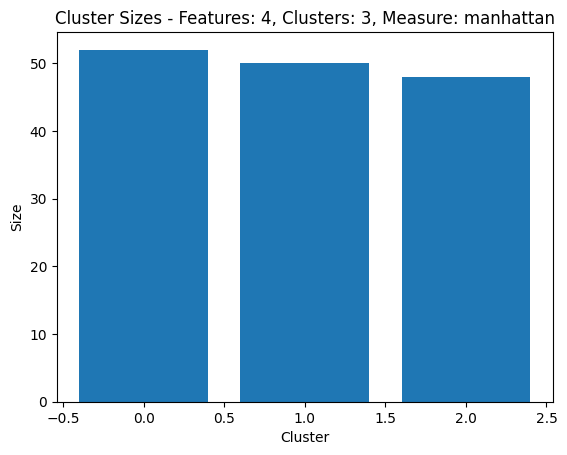

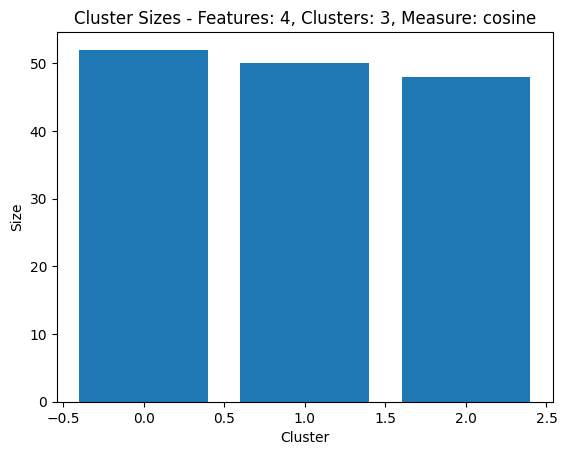

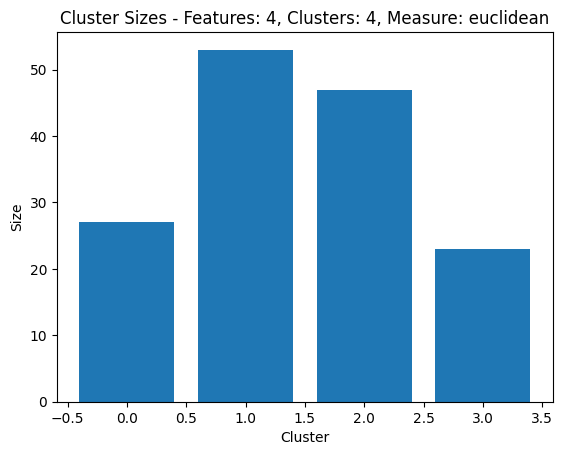

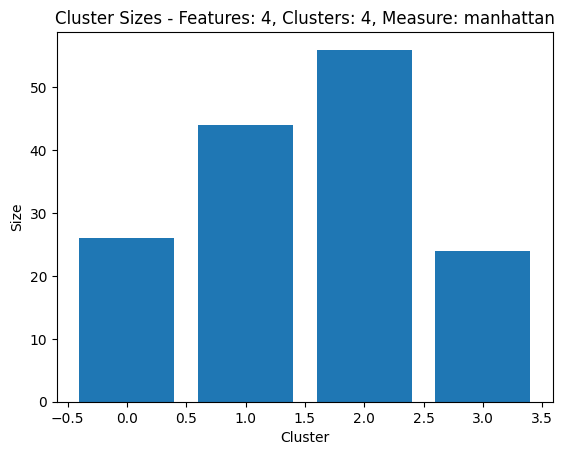

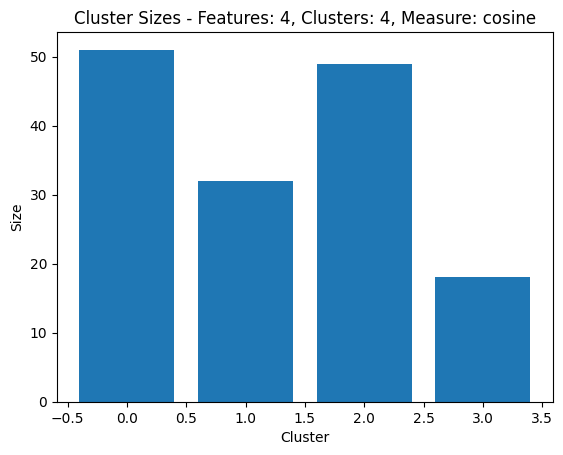

In [43]:
import matplotlib.pyplot as plt
# Visualize and interpret results
for result in results:
    n_features, n_clusters, measure, cluster_sizes = result
    plt.figure()
    plt.bar(range(n_clusters), cluster_sizes)
    plt.title(f'Cluster Sizes - Features: {n_features}, Clusters: {n_clusters}, Measure: {measure}')
    plt.xlabel('Cluster')
    plt.ylabel('Size')
    plt.show()

**Part 2: basic recommender system.**

In [44]:
import pandas as pd 
data = pd.read_csv('/kaggle/input/movielens-100k-dataset/users_and_ratings.csv')

In [45]:
data.columns = ['user_id' , 'movie_id' , 'rating' , 'timestamp']
data=data.sort_values(by=['user_id','movie_id'])
print(data.head(10))

       user_id  movie_id  rating  timestamp
32236        1         1       5  874965758
23171        1         2       3  876893171
83307        1         3       4  878542960
62631        1         4       3  876893119
47638        1         5       3  889751712
5533         1         6       5  887431973
70539        1         7       4  875071561
31650        1         8       1  875072484
20175        1         9       5  878543541
13542        1        10       3  875693118


In [46]:
data=data[['user_id' , 'movie_id' , 'rating' ]]
print(data.head())

       user_id  movie_id  rating
32236        1         1       5
23171        1         2       3
83307        1         3       4
62631        1         4       3
47638        1         5       3


In [47]:
# Split the data into train and test parts by considering 80% and 20% for the splits respectively.
train_data, test_data = train_test_split(data, test_size=0.2)
# Display the shapes of the resulting DataFrames
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (80000, 3)
Testing data shape: (20000, 3)


In [48]:
print(test_data.head())
print(test_data[test_data['movie_id']==3])

       user_id  movie_id  rating
65444      682       156       5
6348       174       255       5
73675      878       481       5
55467      721       264       1
31571      466       183       3
       user_id  movie_id  rating
22944      456         3       4
98256      910         3       2
24092      393         3       3
302        181         3       2
33884      453         3       4
13235       95         3       1
63793      886         3       3
65536      561         3       3
24805      459         3       2
60020      450         3       4
75314      207         3       2
30681      537         3       2
23000      293         3       2
80632      286         3       2
31184      523         3       4
61151      606         3       5
71036      660         3       1
39254      343         3       4
29531      472         3       5
6728       130         3       5
91178      936         3       4
99706      880         3       1
13498       99         3       3


In [49]:
training_data = train_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
testing_data = test_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
# Display the dense tables
print("Dense Training Data:")
print(training_data.head())
print("\nDense Testing Data:")
print(testing_data.head())

Dense Training Data:
movie_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                               ...   
1          0.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5          4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

movie_id  1668  1669  1670  1671  1674  1675  1676  1677  1681  1682  
user_id                                                               
1          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4          0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5          0.

In [50]:
global_mean = training_data.values.mean()

print("Global Mean of Ratings in Training Data:", global_mean)

Global Mean of Ratings in Training Data: 0.18236433495616547


In [51]:
lamb = 0.99  # You can adjust the value of lamb

user_biases = (data.groupby('user_id')['rating'].sum() - global_mean * data.groupby('user_id')['rating'].count()) / (lamb + data.groupby('user_id')['rating'].count())

# Create a DataFrame with user_id, ratings, and user_bias
user_biases_df = pd.DataFrame({
    'ratings': data.groupby('user_id')['rating'],
    'user_bias': user_biases.values
})

# Display the user biases DataFrame
print("User Biases:")
print(user_biases_df.head())

User Biases:
                                             ratings  user_bias
0  (1, [5, 3, 4, 3, 3, 5, 4, 1, 5, 3, 2, 5, 5, 5,...   3.415498
1  (2, [4, 2, 4, 4, 3, 4, 5, 5, 4, 5, 4, 5, 5, 4,...   3.471875
2  (3, [4, 1, 2, 4, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3,...   2.566873
3  (4, [4, 5, 3, 5, 4, 3, 4, 4, 5, 5, 5, 5, 5, 5,...   3.986525
4  (5, [4, 3, 4, 3, 4, 3, 4, 4, 5, 4, 4, 1, 1, 1,...   2.676778


In [52]:
item_biases = (
    data.groupby('movie_id')['rating'].sum() - global_mean * data.groupby('movie_id')['rating'].count()
) / (lamb + data.groupby('movie_id')['rating'].count())

item_biases_df = pd.DataFrame({
    'ratings': data.groupby('movie_id')['rating'],
    'item_bias': item_biases.values
})

# Display the item biases DataFrame
print("Item Biases:")
print(item_biases_df.head())

Item Biases:
                                             ratings  item_bias
0  (1, [5, 4, 4, 4, 4, 3, 1, 5, 4, 5, 3, 5, 5, 5,...   3.687877
1  (2, [3, 3, 3, 2, 3, 5, 1, 3, 3, 4, 4, 3, 2, 2,...   3.001063
2  (3, [4, 2, 3, 4, 3, 2, 4, 2, 1, 3, 3, 5, 3, 3,...   2.819950
3  (4, [3, 5, 4, 5, 5, 5, 3, 4, 5, 4, 2, 4, 4, 3,...   3.351997
4  (5, [3, 1, 2, 3, 4, 4, 4, 4, 3, 3, 2, 4, 3, 3,...   3.084454


In [53]:
missing_values = (
    user_biases.values[:, np.newaxis] + item_biases.values[:training_data.shape[1]] + global_mean
)

# Fill missing values in the training_data pivot table
training_data_filled = training_data.copy().values
mask = (training_data_filled == 0)
training_data_filled[mask] = missing_values[mask]

# Convert back to DataFrame
training_data_filled = pd.DataFrame(training_data_filled, index=training_data.index, columns=training_data.columns)

# Display the filled training data
print("Filled Training Data:")
print(training_data_filled.head())

Filled Training Data:
movie_id      1         2         3         4         5         6     \
user_id                                                                
1         7.285740  3.000000  4.000000  3.000000  3.000000  5.000000   
2         7.342116  6.655302  6.474189  7.006236  6.738694  6.924285   
3         6.437114  5.750300  5.569187  6.101234  5.833691  6.019282   
4         7.856766  7.169952  6.988839  7.520886  7.253343  7.438935   
5         4.000000  3.000000  5.679092  6.211140  5.943597  6.129188   

movie_id      7         8         9         10    ...      1668      1669  \
user_id                                           ...                       
1         4.000000  1.000000  5.000000  3.000000  ...  4.511247  5.013760   
2         7.261235  7.450149  7.355940  7.263191  ...  4.567624  5.070137   
3         6.356233  6.545147  6.450937  6.358189  ...  3.662622  4.165134   
4         7.775885  7.964799  7.870589  7.777841  ...  5.082274  5.584787   
5         6

In [54]:
training_data_array = training_data_filled.values

# Apply SVD
U, S, V = np.linalg.svd(training_data_array, full_matrices=False)
print("matrix U = \n " , U)
print("matrix S = \n " ,S)
print("matrix V = \n " ,V)
print("Shape of U:", U.shape)
print("Shape of S:", S.shape)
print("Shape of V:", V.shape)

matrix U = 
  [[ 0.03125436  0.05660459  0.02375959 ...  0.00140957 -0.00022228
  -0.00042284]
 [ 0.03356381 -0.02965008  0.00010767 ... -0.00413271  0.00947558
   0.00079041]
 [ 0.02883891 -0.04194117  0.00689717 ... -0.0237252  -0.01913332
   0.00333651]
 ...
 [ 0.03509865 -0.02052512  0.00453122 ... -0.00999518 -0.0047727
  -0.0127867 ]
 [ 0.03637957 -0.00157283 -0.04484933 ...  0.00768496 -0.00403619
  -0.00016444]
 [ 0.03134859  0.03319016  0.04265763 ...  0.00041404  0.00111449
   0.0001259 ]]
matrix S = 
  [7.58465371e+03 2.49213625e+02 1.58405355e+02 1.30917678e+02
 1.09367412e+02 9.56508600e+01 9.34511027e+01 8.30411956e+01
 7.96999620e+01 7.71982996e+01 7.40435024e+01 7.34233778e+01
 7.24764681e+01 6.94661298e+01 6.92864661e+01 6.80321329e+01
 6.74305172e+01 6.59515658e+01 6.53305330e+01 6.40351527e+01
 6.35646041e+01 6.31982194e+01 6.23007066e+01 6.19589877e+01
 6.16650192e+01 6.08777567e+01 6.07630203e+01 6.04186987e+01
 6.00650563e+01 5.97728830e+01 5.96338810e+01 5.951482

In [55]:
Approx = 10  # Adjust this value according to your requirement

# Reduce U
U_approx = U[:, :Approx]
print("U approx : \n",U_approx)
# Reduce V
V_approx = V[:Approx, :]
print("V approx : \n",V_approx)
# Reduce S to a square diagonal matrix
S_diag = np.diag(S[:Approx])
print("S diag : \n",S_diag)
# Display the shapes of the reduced matrices
print("Shape of U_approx:", U_approx.shape)
print("Shape of S_diag:", S_diag.shape)
print("Shape of V_approx:", V_approx.shape)

U approx : 
 [[ 0.03125436  0.05660459  0.02375959 ... -0.06219496  0.01485078
  -0.02517175]
 [ 0.03356381 -0.02965008  0.00010767 ...  0.0090835   0.01045155
   0.01852397]
 [ 0.02883891 -0.04194117  0.00689717 ...  0.00060298 -0.00841262
  -0.02512373]
 ...
 [ 0.03509865 -0.02052512  0.00453122 ... -0.00346965  0.01059054
  -0.00248717]
 [ 0.03637957 -0.00157283 -0.04484933 ... -0.01657276  0.00525913
   0.01411073]
 [ 0.03134859  0.03319016  0.04265763 ...  0.03867537 -0.05024535
  -0.0122594 ]]
V approx : 
 [[ 0.02413741  0.02501014  0.02486291 ...  0.02006324  0.02600202
   0.02588578]
 [-0.05509253 -0.04282021  0.00128766 ...  0.01580194  0.01646611
   0.01631554]
 [-0.07540144 -0.054919   -0.04497822 ... -0.00168481  0.00562939
   0.00514692]
 ...
 [ 0.08550093  0.0140699   0.00230866 ...  0.00184228  0.00387517
   0.00527769]
 [-0.05435466  0.00643157 -0.05022252 ...  0.0061121   0.0112028
   0.01263092]
 [-0.07922874 -0.03315883  0.0294334  ...  0.00129337 -0.00491939
  -0.00

In [56]:
Z = np.dot(U_approx, np.dot(S_diag, V_approx))
print("Z : \n",Z)
print(Z.shape)

Z : 
 [[4.75986811 4.91457346 5.46009837 ... 4.99292021 6.43969107 6.39829954]
 [6.20571283 6.94746556 6.2245704  ... 5.05302648 6.56173269 6.53484373]
 [6.71328357 5.60486608 5.57453861 ... 4.2447235  5.58180282 5.56893818]
 ...
 [6.37384367 6.85234471 6.42933768 ... 5.23324145 6.80429733 6.76822532]
 [7.22252457 7.23516147 7.36428086 ... 5.56122574 7.16009805 7.13926916]
 [5.83687587 4.97571666 5.89897796 ... 4.82243152 6.27829195 6.24244935]]
(943, 1643)


In [57]:
# Ensure that the boolean index has the correct shape
non_zero_entries_mask = testing_data.values != 0

# Extract non-zero entries from testing_data and Z using np.ix_
testing_data_non_zero = testing_data.values[np.ix_(non_zero_entries_mask.any(axis=1), non_zero_entries_mask.any(axis=0))]
Z_non_zero = Z[np.ix_(non_zero_entries_mask.any(axis=1), non_zero_entries_mask.any(axis=0))]

# Calculate absolute differences
abs_diff = np.abs(testing_data_non_zero - Z_non_zero)

# Calculate MAE
mae = np.sum(abs_diff) / np.sum(non_zero_entries_mask)

print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 406.2484567729017


In [58]:
# Define the values of Approx
approx_values = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
mae_values = []
# Initialize a dictionary to store MAE for each value of Approx
mae_results = {}

for Approx in approx_values:
    # Reduce U, S, V
    U_approx = U[:, :Approx]
    S_approx = np.diag(S[:Approx])
    V_approx = V[:Approx, :]
    
    # Calculate Z
    Z = np.dot(U_approx, np.dot(S_approx, V_approx))
    
    # Split data into train and test
    train_data, test_data = train_test_split(data, test_size=0.2,random_state=42)
    testing_data = test_data.pivot(index='user_id', columns='movie_id', values='rating').fillna(0)
    # Extract non-zero entries from testing_data and Z
    non_zero_entries_mask = testing_data.values != 0

    # Extract non-zero entries from testing_data and Z using np.ix_
    testing_data_non_zero = testing_data.values[np.ix_(non_zero_entries_mask.any(axis=1), non_zero_entries_mask.any(axis=0))]
    Z_non_zero = Z[np.ix_(non_zero_entries_mask.any(axis=1), non_zero_entries_mask.any(axis=0))]

    # Calculate absolute differences
    abs_diff = np.abs(testing_data_non_zero - Z_non_zero)

    # Calculate MAE
    mae = np.sum(abs_diff) / np.sum(non_zero_entries_mask)

    
    # Store MAE for the current value of Approx
    mae_results[Approx] = mae
    
# Display the results
for Approx, mae in mae_results.items():
    mae_values.append(mae)
    print(f"Approx: {Approx}, MAE: {mae}")

Approx: 5, MAE: 405.11033336445934
Approx: 10, MAE: 405.11098525760985
Approx: 15, MAE: 405.11789926227436
Approx: 20, MAE: 405.12409468865246
Approx: 25, MAE: 405.12748237412455
Approx: 30, MAE: 405.13135045651774
Approx: 35, MAE: 405.13477820762023
Approx: 40, MAE: 405.1381858273268
Approx: 45, MAE: 405.14031043549033
Approx: 50, MAE: 405.14340648857353


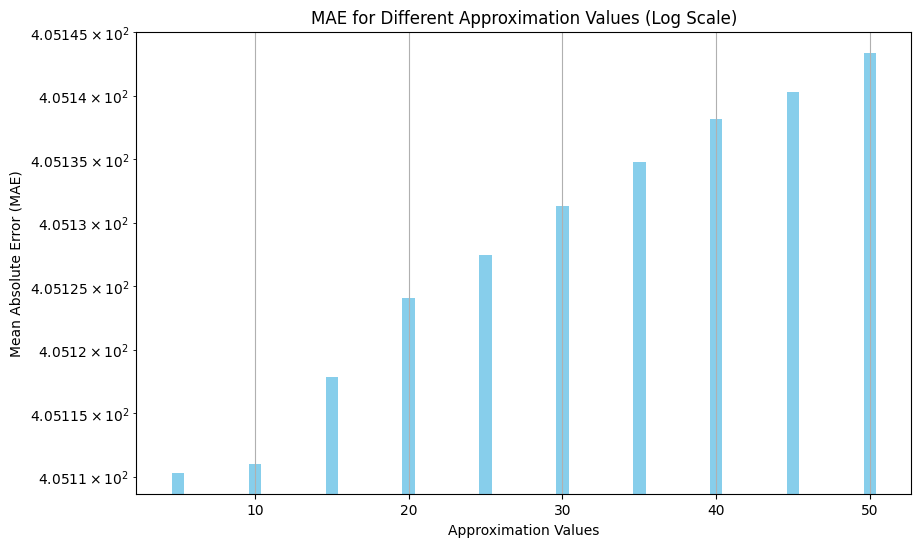

In [59]:
import matplotlib.pyplot as plt
# Plotting the bar graph with a log scale
plt.figure(figsize=(10, 6))
plt.bar(approx_values, mae_values, color='skyblue')
plt.xscale('linear')  # Use linear scale for x-axis
plt.yscale('log')  # Use log scale for y-axis
plt.xlabel('Approximation Values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE for Different Approximation Values (Log Scale)')
plt.grid(True)
plt.show()